In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from collections import Counter

1. Relevance
- Why it's important:
    - There are so many games on Steam that it can be hard for consumers to find ones they will like. This project will help them choose games more easily based on what they want.
2. Context
- Background:
    - Steam has a huge number of games in different genres and price ranges. However, this makes it difficult for users to find games that match their interests. This project uses data analysis 
 to make it easier for them to find the right games.
3. Issue
- What needs to be fixed:
    - Users often spend too much time searching for games and may end up with games they don’t enjoy. There is no easy way to recommend games based on personal preferences.
4. Impact
- Why it’s a problem:
    - Without a good recommendation system, users may waste time and money on games they don’t like, leading to frustration and a poor gaming experience.
5. Vision
- What will change:
    - With a data-driven recommendation system, users will quickly find games they love, making their gaming experience better and more enjoyable.

In [4]:
df = pd.read_csv('steam_games_MAY_2024.csv')
df

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,16213,578,3016,331,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83641,1745960,Circuit Breaker,2021-10-21,0,4.99,1,Circuit Breaker is a turn-based strategy game ...,Circuit Breaker is a turn-based strategy game ...,"In the cyber-future of 2009, the most popular ...",NaN,...,0,0,0,0,0,"{'Strategy': 72, 'Casual': 48, 'PvE': 47, 'Sin...",-1,-1,-1,-1
83642,1888920,Chess vs Chat,2022-08-09,0,3.99,0,Chess Vs Chat allows streamers to host chess m...,Chess Vs Chat allows streamers to host chess m...,Allow your chatters to actively participate an...,NaN,...,0,0,0,0,0,"{'Indie': 31, 'Strategy': 21, 'Puzzle': 11, 'M...",-1,-1,-1,-1
83643,2166420,Orbtangle,2022-10-28,0,1.99,0,Orbtangle is a simplistic puzzle game which re...,Orbtangle is a simplistic puzzle game which re...,Orbtangle is a simplistic puzzle game which re...,NaN,...,0,0,0,0,0,"{'Puzzle': 54, 'Colorful': 46, 'Relaxing': 44,...",-1,-1,-1,-1
83644,1456260,Flashlight,2021-10-25,0,2.99,0,Play with Friends Play with or against your fr...,Play with Friends Play with or against your fr...,"Salvage scrap, build defenses, and rank-up to ...",NaN,...,0,0,0,0,0,"{'Top-Down Shooter': 138, 'Rogue-lite': 132, '...",-1,-1,-1,-1


In [5]:
df.describe()

,AppID,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,score_rank,positive,negative,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.364600e+04,83646.000000,83646.000000,83646.000000,83646.000000,83646.000000,8.364600e+04,83646.000000,41.000000,8.364600e+04,8.364600e+04,83646.000000,83646.000000,83646.000000,83646.000000,8.364600e+04,83646.000000,8.364600e+04,83646.000000,83646.000000
mean,1.421850e+06,0.276403,7.492446,0.580542,3.451080,20.702735,1.003478e+03,0.037467,99.121951,1.276726e+03,2.072231e+02,79.663044,3.634364,65.152572,3.744925,9.927115e+01,45.985223,1.345631e+03,5.596191,18.757430
std,7.480058e+05,2.119835,13.094604,14.179160,15.685104,167.839222,2.108173e+04,1.737074,0.748168,3.057663e+04,5.792324e+03,1018.506902,74.621737,933.278070,82.321592,5.914524e+03,40.607112,3.411672e+04,22.911354,1155.763735
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,7.922225e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.373005e+06,0.000000,4.990000,0.000000,0.000000,4.000000,0.000000e+00,0.000000,99.000000,1.100000e+01,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,60.000000,1.600000e+01,-1.000000,-1.000000
75%,2.014495e+06,0.000000,9.990000,0.000000,0.000000,20.000000,0.000000e+00,0.000000,100.000000,6.400000e+01,1.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,84.000000,8.700000e+01,-1.000000,-1.000000
max,2.984570e+06,21.000000,999.980000,3165.000000,97.000000,9821.000000,4.111974e+06,100.000000,100.000000,7.024836e+06,1.029779e+06,95816.000000,6836.000000,110101.000000,9874.000000,1.362469e+06,100.000000,8.071426e+06,100.000000,321958.000000


In [6]:
df.columns

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     83646 non-null  int64  
 1   name                      83643 non-null  object 
 2   release_date              83646 non-null  object 
 3   required_age              83646 non-null  int64  
 4   price                     83646 non-null  float64
 5   dlc_count                 83646 non-null  int64  
 6   detailed_description      83480 non-null  object 
 7   about_the_game            83458 non-null  object 
 8   short_description         83537 non-null  object 
 9   reviews                   10283 non-null  object 
 10  header_image              83646 non-null  object 
 11  website                   39760 non-null  object 
 12  support_url               42081 non-null  object 
 13  support_email             73067 non-null  object 
 14  window

In [8]:
df.isna().sum()

AppID                           0
name                            3
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          166
about_the_game                188
short_description             109
reviews                     73363
header_image                    0
website                     43886
support_url                 41565
support_email               10579
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              79706
achievements                    0
recommendations                 0
notes                       69437
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

In [9]:
# Columns to fill
columns_to_fill = ['name', 'about_the_game', 'developers', 'publishers', 'categories', 'genres', 'tags']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df['release_date'].head())

0   2012-08-21
1   2017-12-21
2   2013-07-09
3   2015-04-13
4   2015-12-01
Name: release_date, dtype: datetime64[ns]


In [11]:
columns_to_drop = [
    'AppID',
    'detailed_description',
    'about_the_game',
    'short_description',
    'reviews',
    'header_image',
    'website',
    'support_url',           
    'support_email',         
    'notes',                 
    'packages',              
    'metacritic_url',        
    'screenshots',           
    'movies',                
    'dlc_count',
    'supported_languages',
    'full_audio_languages',
    'median_playtime_forever',
    'median_playtime_2weeks'
]


In [12]:
df = df.drop(columns = columns_to_drop)

In [13]:
df.isna().sum()

name                            0
release_date                    0
required_age                    0
price                           0
windows                         0
mac                             0
linux                           0
metacritic_score                0
achievements                    0
recommendations                 0
developers                      0
publishers                      0
categories                      0
genres                          0
user_score                      0
score_rank                  83605
positive                        0
negative                        0
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
peak_ccu                        0
tags                            0
pct_pos_total                   0
num_reviews_total               0
pct_pos_recent                  0
num_reviews_recent              0
dtype: int64

In [14]:
df.head()

,name,release_date,required_age,price,windows,mac,linux,metacritic_score,achievements,recommendations,...,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,Counter-Strike 2,2012-08-21,0,0.00,True,False,True,0,1,4111974,...,1029779,100000000 - 200000000,29018,753,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,True,False,False,0,37,1701431,...,981860,50000000 - 100000000,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,Dota 2,2013-07-09,0,0.00,True,True,True,90,0,14329,...,406030,200000000 - 500000000,35557,1327,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,Grand Theft Auto V,2015-04-13,17,0.00,True,False,False,96,77,1641404,...,236827,50000000 - 100000000,12898,590,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181
4,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,True,False,False,0,0,1088708,...,190046,20000000 - 50000000,16213,578,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566


In [15]:
df['score_rank'].isna().sum()

83605

In [16]:
df['score_rank'].fillna(0, inplace = True)
df['score_rank'].sort_values(ascending = False)

C:\Users\Dylan\AppData\Local\Temp\ipykernel_16228\3787584940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score_rank'].fillna(0, inplace = True)


34762    100.0
22738    100.0
19969    100.0
10690    100.0
16478    100.0
         ...  
27899      0.0
27898      0.0
27897      0.0
27896      0.0
83645      0.0
Name: score_rank, Length: 83646, dtype: float64

In [17]:
df['estimated_owners'].unique

<bound method Series.unique of 0        100000000 - 200000000
1         50000000 - 100000000
2        200000000 - 500000000
3         50000000 - 100000000
4          20000000 - 50000000
                 ...          
83641                0 - 20000
83642                0 - 20000
83643                0 - 20000
83644                0 - 20000
83645                0 - 20000
Name: estimated_owners, Length: 83646, dtype: object>

In [18]:
# Split the 'estimated_owners' range into two columns: lower and upper bound
df[['lower_bound', 'upper_bound']] = df['estimated_owners'].str.split(' - ', expand=True)

# Convert to numeric
df['lower_bound'] = pd.to_numeric(df['lower_bound'], errors='coerce')
df['upper_bound'] = pd.to_numeric(df['upper_bound'], errors='coerce')

# Calculate the average of the lower and upper bound
df['estimated_owners_avg'] = (df['lower_bound'] + df['upper_bound']) / 2

# Drop the lower and upper bound columns if its not needed
df = df.drop(columns=['lower_bound', 'upper_bound'])

# Check the result
df[['estimated_owners', 'estimated_owners_avg']].head()

,estimated_owners,estimated_owners_avg
0,100000000 - 200000000,150000000.0
1,50000000 - 100000000,75000000.0
2,200000000 - 500000000,350000000.0
3,50000000 - 100000000,75000000.0
4,20000000 - 50000000,35000000.0


In [19]:
df['estimated_owners_avg'].dtypes

dtype('float64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      83646 non-null  object        
 1   release_date              83646 non-null  datetime64[ns]
 2   required_age              83646 non-null  int64         
 3   price                     83646 non-null  float64       
 4   windows                   83646 non-null  bool          
 5   mac                       83646 non-null  bool          
 6   linux                     83646 non-null  bool          
 7   metacritic_score          83646 non-null  int64         
 8   achievements              83646 non-null  int64         
 9   recommendations           83646 non-null  int64         
 10  developers                83646 non-null  object        
 11  publishers                83646 non-null  object        
 12  categories        

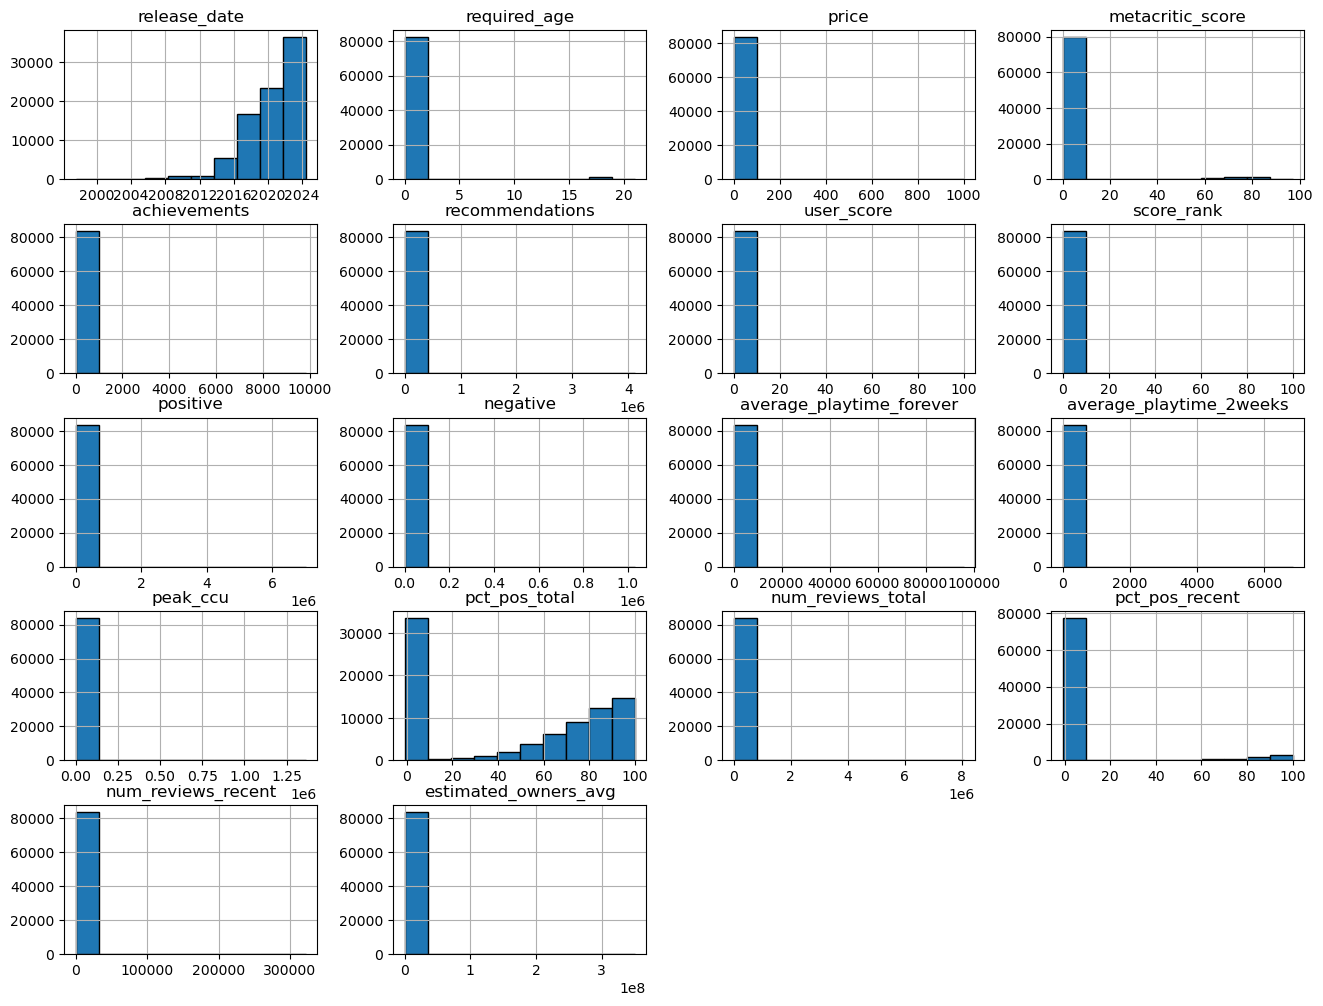

In [21]:
df.hist(figsize = ( 16, 12 ), edgecolor='black')
plt.show()

In [24]:
# We know that there are a lot of games that are in steam, so lets try to find one game
game=df['peak_ccu'].idxmax()
find_game=df.loc[game]
print(find_game)

name                                                         Counter-Strike 2
release_date                                              2012-08-21 00:00:00
required_age                                                                0
price                                                                     0.0
windows                                                                  True
mac                                                                     False
linux                                                                    True
metacritic_score                                                            0
achievements                                                                1
recommendations                                                       4111974
developers                                                          ['Valve']
publishers                                                          ['Valve']
categories                  ['Multi-player', 'Cross-Platform Mul

- As you can see on the top, 'Counter-Strike 2' has the highest peak concurrent users (ccu) in steam.

## Exploratory Data Analysis (EDA):

Perform EDA to understand trends, patterns, and anomalies:

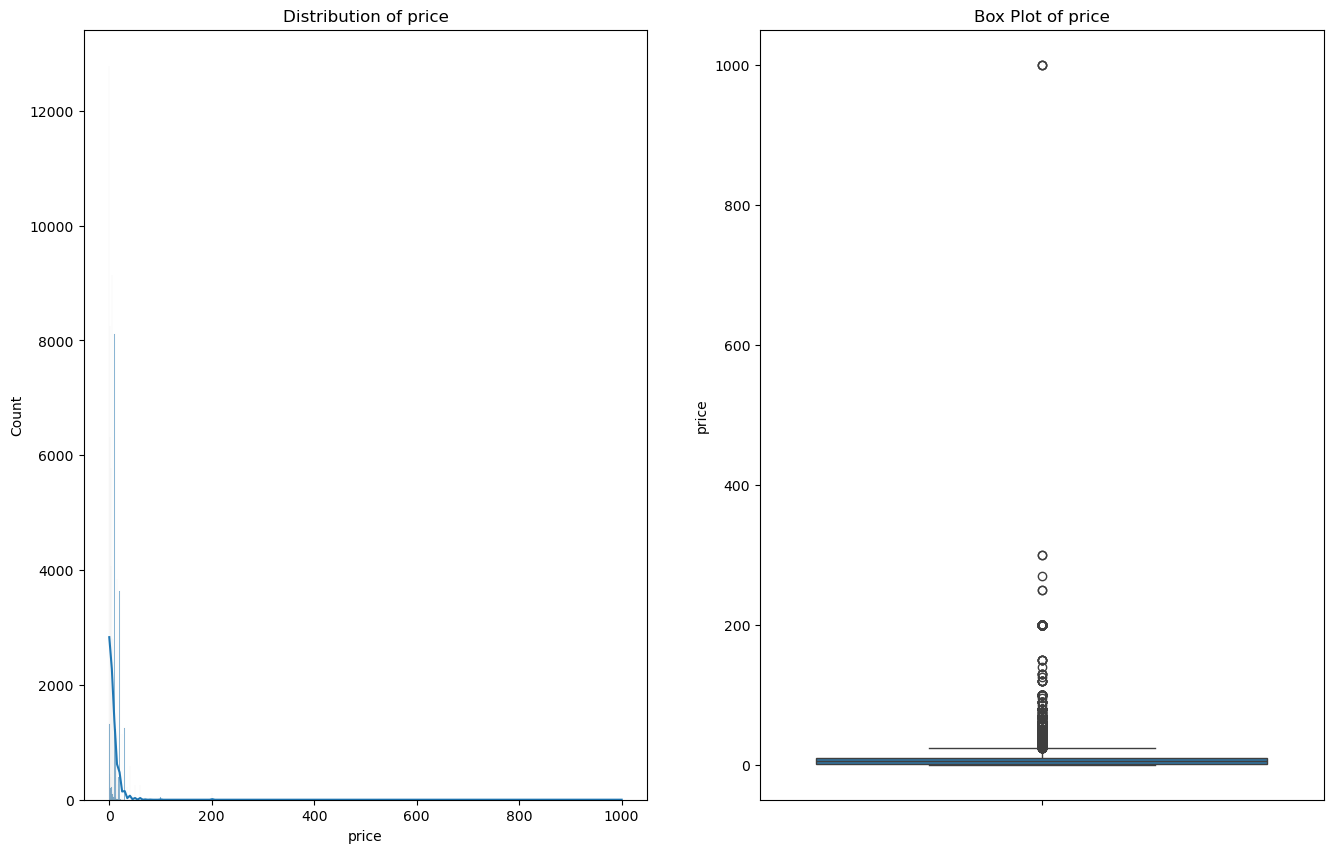

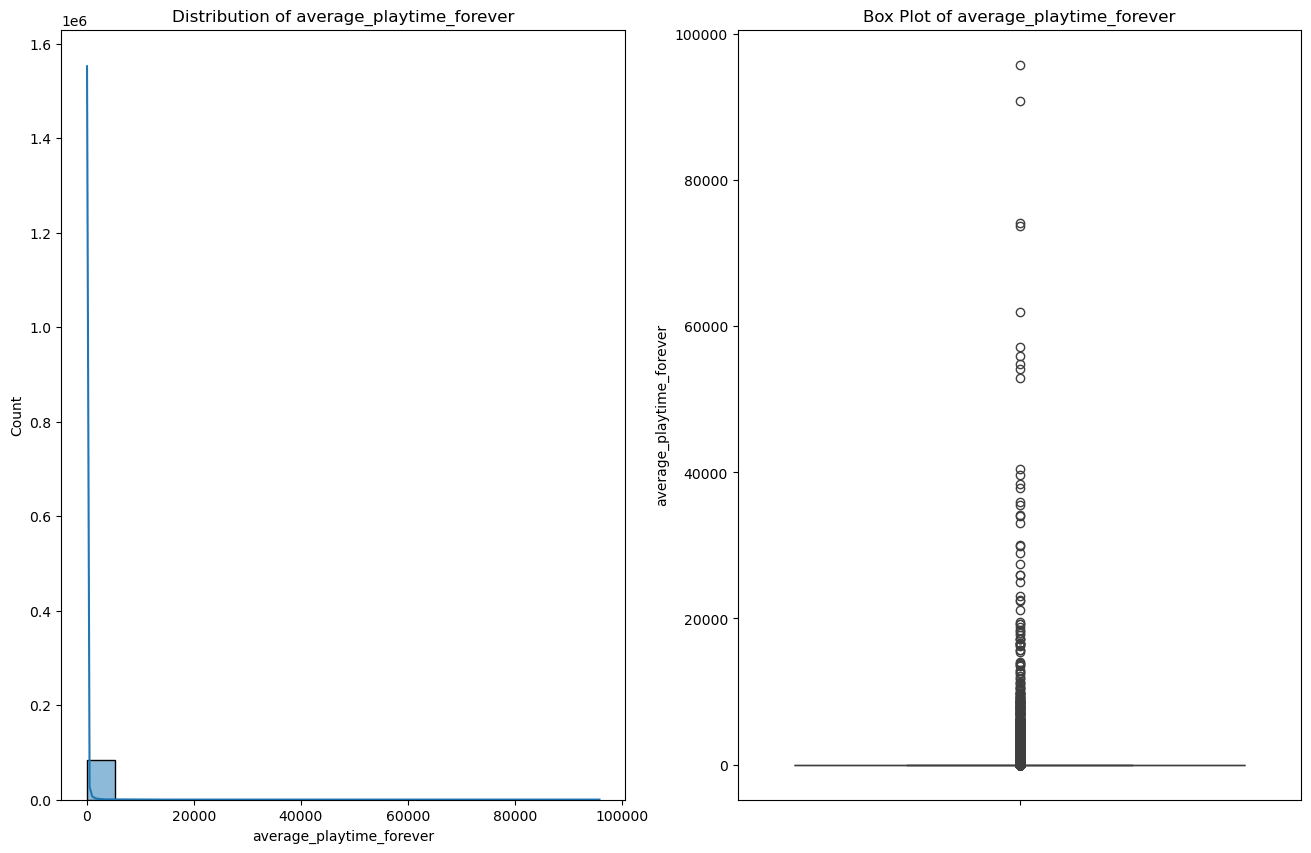

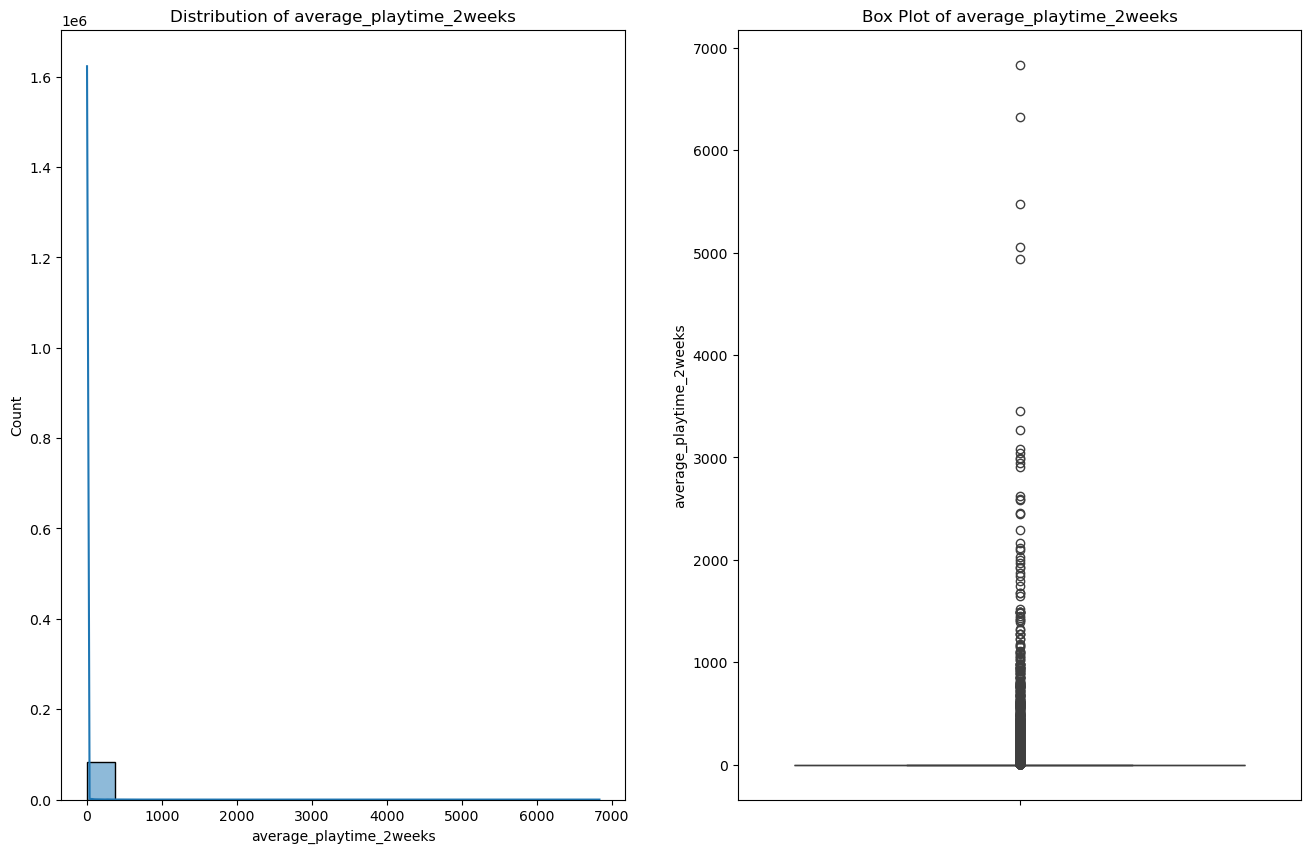

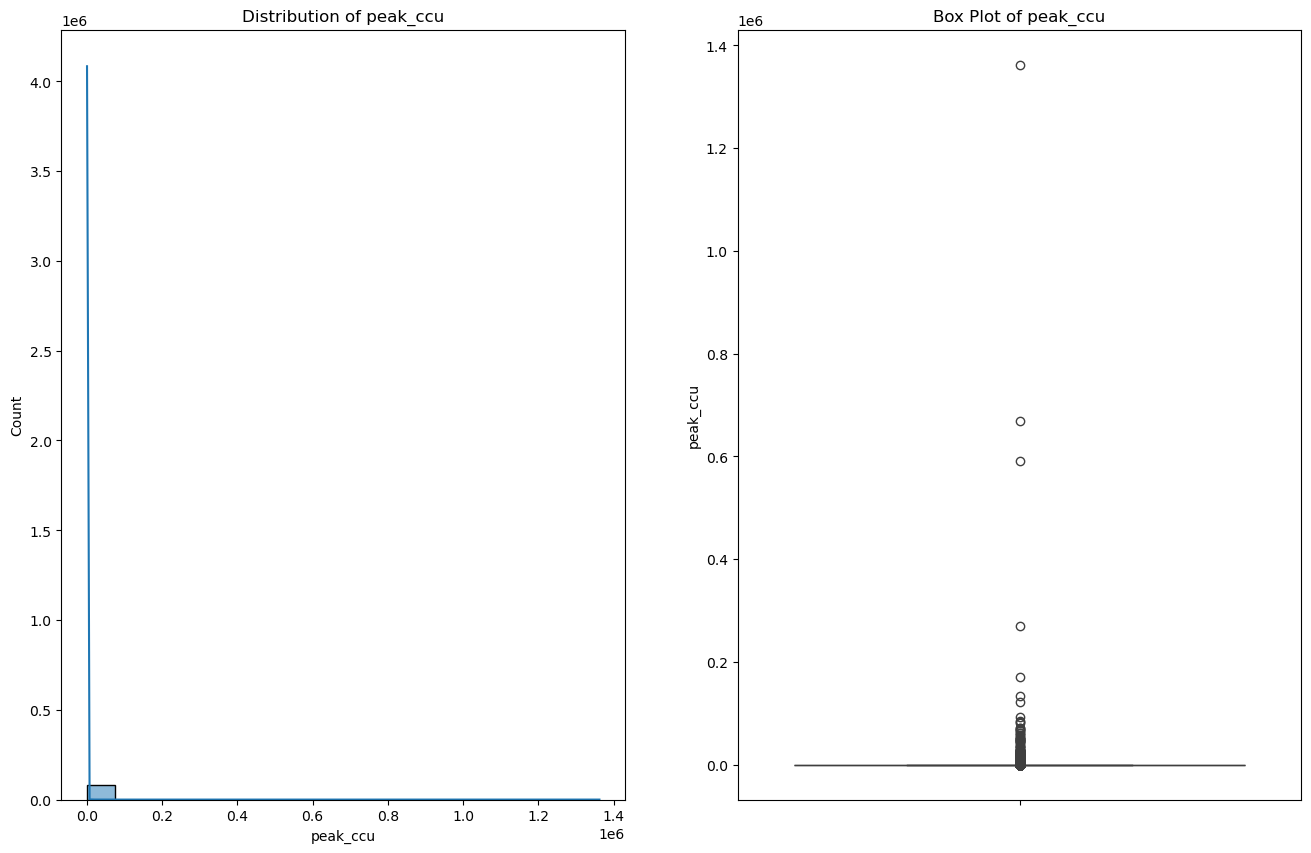

In [27]:
# Select important numeric features
numeric_features = ['price', 'average_playtime_forever', 'average_playtime_2weeks', 
                    'peak_ccu']

# Plot distributions and box plots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize = (16, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    
    plt.show()

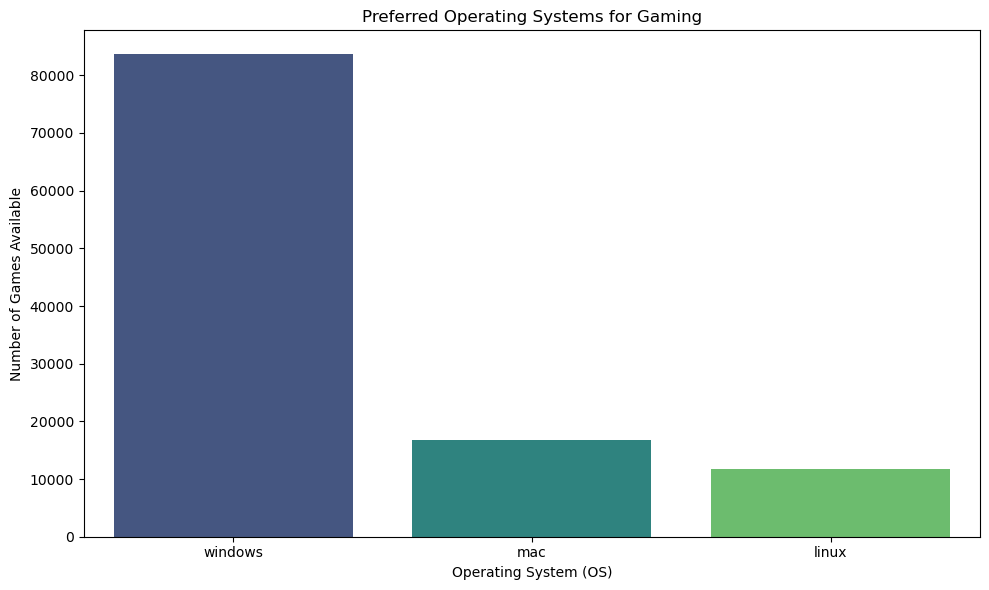

In [28]:
# Now lets check which OS is most preferred for gaming.

os_group = df[['windows', 'mac', 'linux']].sum()
os_group = os_group.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=os_group.index, y=os_group.values, hue=os_group.index, palette='viridis')
plt.title('Preferred Operating Systems for Gaming')
plt.xlabel('Operating System (OS)')
plt.ylabel('Number of Games Available')

plt.tight_layout()
plt.show()

- The graph shows that Windows is the most widely used operating system among gamers. This highlights Windows' dominance in gaming, with significantly more games available for it compared to other platforms.

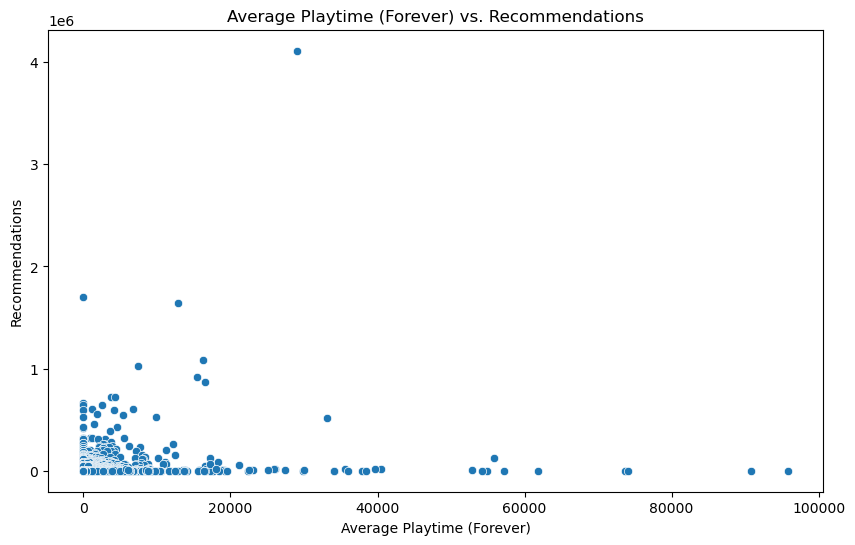

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_playtime_forever', y='recommendations', data=df)
plt.title('Average Playtime (Forever) vs. Recommendations')
plt.xlabel('Average Playtime (Forever)')
plt.ylabel('Recommendations')

plt.show()

- There is a general trend where games with higher average playtime tend to receive more recommendations, indicating that games with longer engagement are more likely to be recommended by players.

In [32]:
# Sort by metacritic_score to get the top 10 games
top_games_metacritic = df[['name', 'metacritic_score', 'user_score', 'recommendations']].sort_values(by='metacritic_score', ascending=False).head(10)

# Sort by recommendations
top_games_recommendations = df[['name', 'metacritic_score', 'user_score', 'recommendations']].sort_values(by='recommendations', ascending=False).head(10)

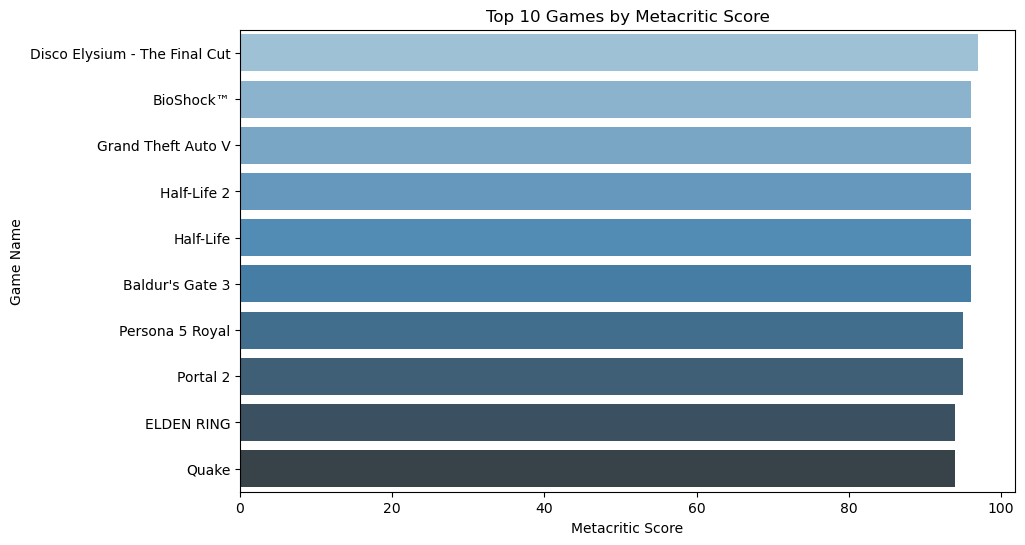

In [33]:
# Set plot style
# plt.style.use('ggplot')

# Bar plot for Metacritic Score
plt.figure(figsize=(10, 6))
sns.barplot(x='metacritic_score', y='name', hue = 'name', data=top_games_metacritic, palette='Blues_d')
plt.title('Top 10 Games by Metacritic Score')
plt.xlabel('Metacritic Score')
plt.ylabel('Game Name')
plt.show()

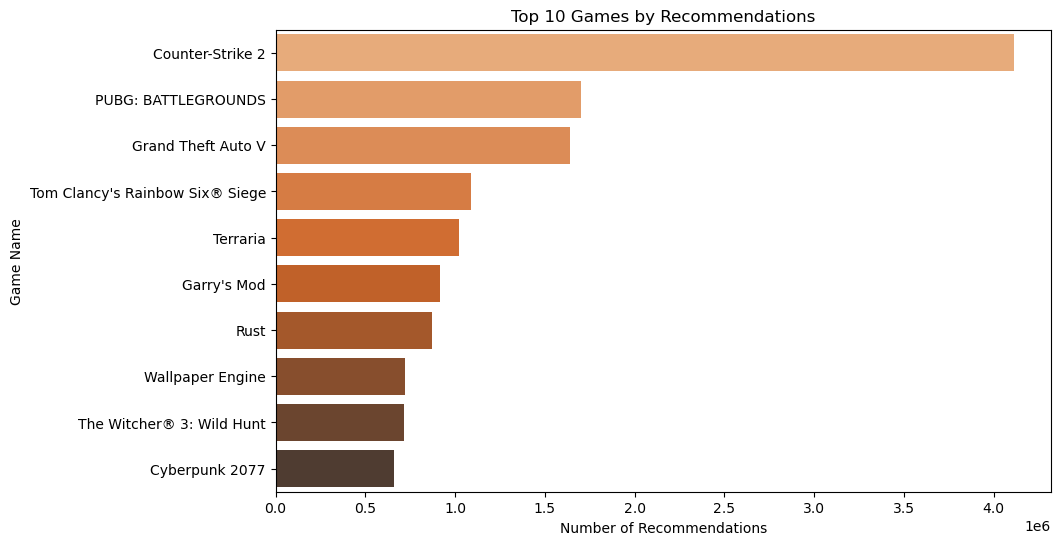

In [34]:
# Bar plot for Recommendations
plt.figure(figsize=(10, 6))
sns.barplot(x='recommendations', y='name', hue = 'name', data=top_games_recommendations, palette='Oranges_d')
plt.title('Top 10 Games by Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Game Name')
plt.show()

In [35]:
df['average_playtime_forever'].sort_values(ascending = False)

68754    95816
5744     90780
9502     74118
4471     73663
4680     61882
         ...  
33732        0
33731        0
33730        0
33729        0
83645        0
Name: average_playtime_forever, Length: 83646, dtype: int64

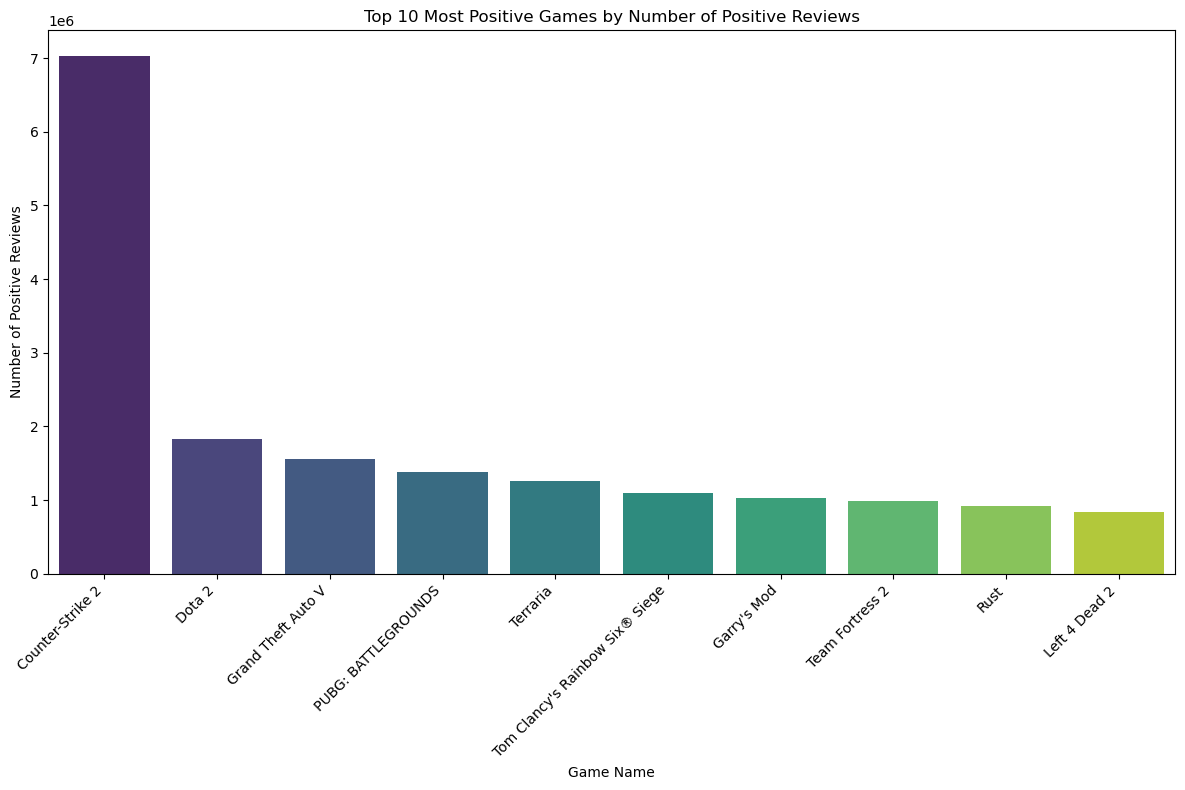

In [36]:
# Sort the DataFrame by the 'positive' column (or 'pct_pos_total' if available) to get the top 10 most positive games
top_10_positive_games = df.sort_values(by='positive', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_positive_games['name'], y=top_10_positive_games['positive'], hue =top_10_positive_games['name'], palette='viridis')

# Add title and labels
plt.title('Top 10 Most Positive Games by Number of Positive Reviews')
plt.xlabel('Game Name')
plt.ylabel('Number of Positive Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

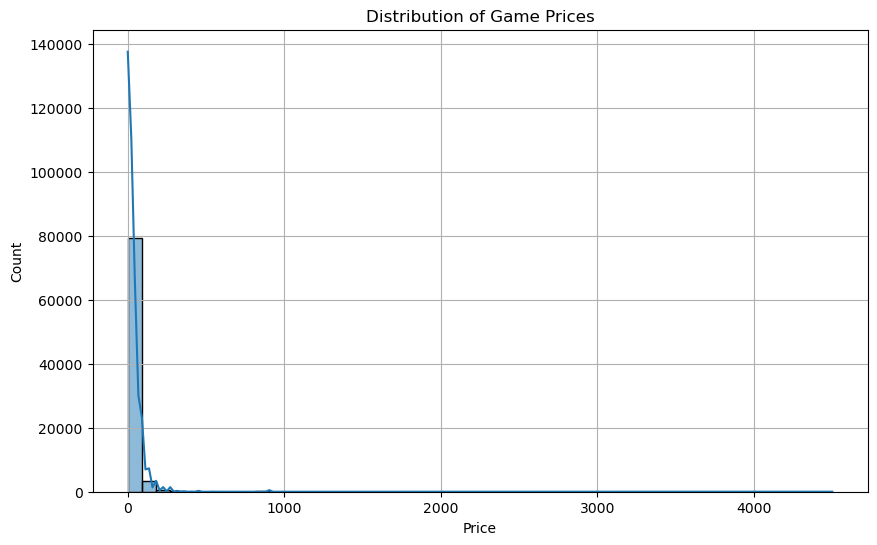

In [37]:
# Price Distribution
usd_to_myr = 4.50 
df['price_myr'] = df['price'] * usd_to_myr

plt.figure(figsize=(10, 6))
sns.histplot(df['price_myr'], bins=50, kde=True)
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid()

plt.show()

- Most games are priced under a specific range, with a noticeable peak at lower prices, indicating that many games are affordable or free.

- There’s a general positive correlation between Metacritic and user scores, but some games have significant differences in critical and user reception.

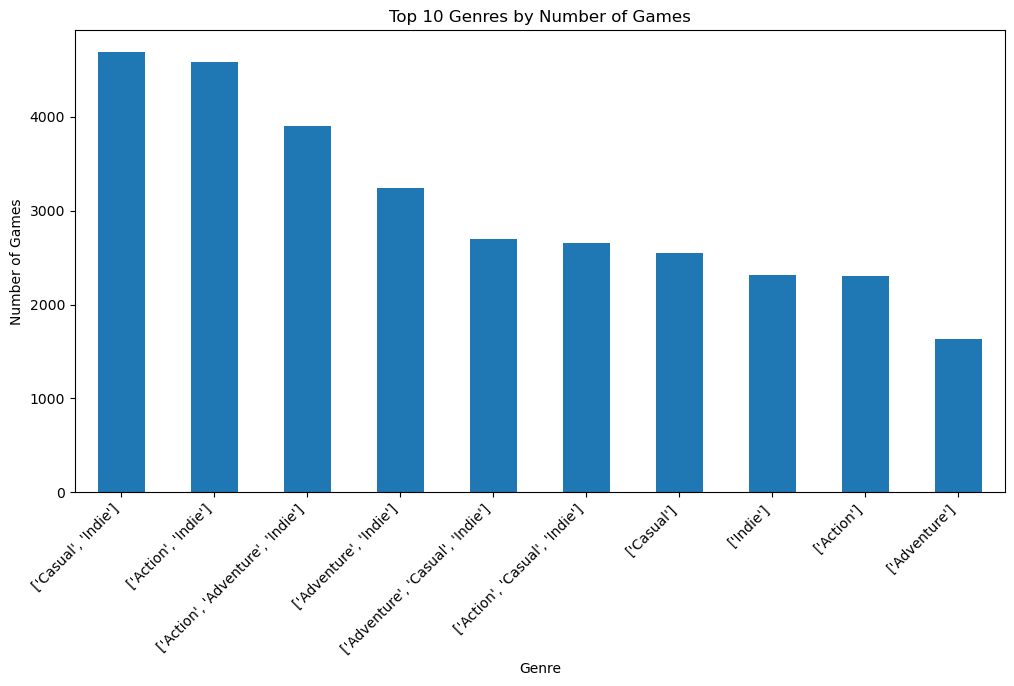

In [40]:
# Distribution of Games by Genre
plt.figure(figsize=(12, 6))
df['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres by Number of Games')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


- Certain genres, such as Action and Adventure, dominate the gaming market, with more games available compared to niche genres.

## Preprocessing:

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
df.select_dtypes(include=['object']).columns, df.select_dtypes(include=['int64', 'float64']).columns

(Index(['name', 'developers', 'publishers', 'categories', 'genres',
        'estimated_owners', 'tags'],
       dtype='object'),
 Index(['required_age', 'price', 'metacritic_score', 'achievements',
        'recommendations', 'user_score', 'score_rank', 'positive', 'negative',
        'average_playtime_forever', 'average_playtime_2weeks', 'peak_ccu',
        'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
        'num_reviews_recent', 'estimated_owners_avg', 'price_myr'],
       dtype='object'))

In [45]:
X = df.drop(['user_score','estimated_owners'], axis = 1)
y = df['user_score']

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      83646 non-null  object        
 1   release_date              83646 non-null  datetime64[ns]
 2   required_age              83646 non-null  int64         
 3   price                     83646 non-null  float64       
 4   windows                   83646 non-null  bool          
 5   mac                       83646 non-null  bool          
 6   linux                     83646 non-null  bool          
 7   metacritic_score          83646 non-null  int64         
 8   achievements              83646 non-null  int64         
 9   recommendations           83646 non-null  int64         
 10  developers                83646 non-null  object        
 11  publishers                83646 non-null  object        
 12  categories        

In [47]:
y.dtype

dtype('int64')

In [48]:
# Loop through all object columns and print the number of unique values
for col in X.select_dtypes(include='object').columns:
    unique_values = df[col].nunique()
    print(f'Total Unique {col.capitalize()}: {unique_values}')


Total Unique Name: 83007
Total Unique Developers: 51516
Total Unique Publishers: 44832
Total Unique Categories: 7183
Total Unique Genres: 2601
Total Unique Tags: 67207


In [49]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [50]:
numeric_features, categorical_features

(Index(['required_age', 'price', 'metacritic_score', 'achievements',
        'recommendations', 'score_rank', 'positive', 'negative',
        'average_playtime_forever', 'average_playtime_2weeks', 'peak_ccu',
        'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
        'num_reviews_recent', 'estimated_owners_avg', 'price_myr'],
       dtype='object'),
 Index(['name', 'developers', 'publishers', 'categories', 'genres', 'tags'], dtype='object'))

In [51]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['required_age', 'price', 'metacritic_score', 'achievements',
       'recommendations', 'score_rank', 'positive', 'negative',
       'average_playtime_forever', 'average_playtime_2weeks', 'peak_ccu',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent', 'estimated_owners_avg', 'price_myr'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['name', 'developers', 'publishers', 'categories', 'genres', 'tags'], dtype='object'))])

# Model Building

In [53]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
model_pipelines = {
    'LinearRegression': Pipeline([('preprocessor', preprocessor), ('classifier', LinearRegression())]),
    'RandomForest': Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestRegressor())]),
    'AdaBoost': Pipeline([('preprocessor', preprocessor), ('classifier', AdaBoostRegressor())]),
    'XGBoost': Pipeline([('preprocessor', preprocessor), ('classifier', XGBRegressor())]),
    'SVM': Pipeline([('preprocessor', preprocessor), ('classifier', SVR())])
}

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((66916, 27), (66916,), (16730, 27), (16730,))

In [109]:
results = {}

# Loop through each model pipeline
for model_name, pipeline in model_pipelines.items():
    # Fit the model pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Cross-validation on the training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate on test data
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results for comparison
    results[model_name] = {
        'CV RMSE': cv_rmse,
        'Test RMSE': rmse,
        'R2 Score': r2
    }

# Display results
for model, metrics in results.items():
    print(f"{model} Scores: {metrics}:")

LinearRegression Scores: {'CV RMSE': 0.4013471998484571, 'Test RMSE': 0.4517618236115427, 'R2 Score': 0.9226644845242606}:
RandomForest Scores: {'CV RMSE': 0.16748841817047272, 'Test RMSE': 0.16255770964777236, 'R2 Score': 0.989986749699993}:
AdaBoost Scores: {'CV RMSE': 0.16198073065298113, 'Test RMSE': 0.1685154486042449, 'R2 Score': 0.9892393285706544}:
XGBoost Scores: {'CV RMSE': 0.16484327225095796, 'Test RMSE': 0.18631289213302663, 'R2 Score': 0.98684636629057}:
SVM Scores: {'CV RMSE': 1.6154306476803553, 'Test RMSE': 1.4018923465843691, 'R2 Score': 0.25528644540473944}:
